In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [47]:

# import the necessary modules
import numpy as np
from astropy.io import fits
from astropy.table import Table

# load in the file of stars you want the spectra for

file = 'APOGEE_BOSS.fits'
path = '/Users/dhortadarrington/Documents/Projects/Lux-BOSS/data/'+str(file)
tb = fits.open(path)
dat = tb[1].data 

# mask out any bad or missing values
mask = (dat['snr_boss']>20)
print('Initial size of sample: '+str(len(dat)))
dat = dat[mask]
dat = dat[:10000]
print('Size of sample with good stellar parameters: '+str(len(dat)))


Initial size of sample: 26075
Size of sample with good stellar parameters: 10000


In [43]:
# command line command to get spectra for one star 
# wget --spider https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/000+02/apStar-dr17-2M17335483-2753043.fits
# the "redux" path gets you the raw visit spectra, which isn't combined. Below is the path needed to get the combined spectra

print('Downloading spectra for '+str(len(dat))+' stars')

# Code to do bulk download
master = 'wget -P /User/dhortadarrington/Documents/Projects/Lux-BOSS/spec/ -np -xnH --cut-dirs 9 --no-check-certificate --user sdss5 --password panoPtic-5 -r https://data.sdss.org/sas/sdsswork/mwm/spectro/astra/'

#example spectra file link: https://data.sdss5.org/sas/sdsswork/mwm/spectro/astra/0.6.0/spectra/star/00/00/mwmStar-0.6.0-102600000.fits

astra_version = dat['v_astra']
data_type = 'spectra'
object_type = 'star'
filetype = dat['filetype']
sdss_id = dat['sdss_id']


paths = []
for indx, i in enumerate(file):
    first_dir_name = str(sdss_id[indx])[-4:-2]
    second_dir_name = str(sdss_id[indx])[-2:]
    paths.append(master+astra_version[indx]+str('/')+data_type+str('/')+object_type+str('/')+\
    first_dir_name+str('/')+second_dir_name+str('/')+filetype[indx]+str('-')+\
    astra_version[indx]+str('-')+str(sdss_id[indx])+str('.fits'))
                  


In [2]:
# LOAD THE DATA
file = '../spec/spec-016199-60606-27021597863477824.fits'
file_in = fits.open(file)
flux = np.array(file_in[1].data)


In [3]:
flux

array([(191.05867 , 3.5523   , 0.00043323,        0,        0, 1.3104117, 78.032394, 101.02278 , 2.771651 ),
       ( 47.022614, 3.5523999, 0.00039925,        0,        0, 1.3105419, 73.357445, 112.51531 , 2.7723062),
       (358.0707  , 3.5525   , 0.0003976 ,        0,        0, 1.3106744, 70.66255 , 121.739555, 2.7729664),
       ...,
       (412.9577  , 4.0168   , 0.        , 83886080, 83886080, 0.       ,  0.      , 440.69928 , 0.       ),
       (412.9577  , 4.0169   , 0.        , 83886080, 83886080, 0.       ,  0.      , 419.9722  , 0.       ),
       (412.9577  , 4.017    , 0.        , 83886080, 83886080, 0.       ,  0.      , 422.41336 , 0.       )],
      dtype=(numpy.record, [('FLUX', '>f4'), ('LOGLAM', '>f4'), ('IVAR', '>f4'), ('AND_MASK', '>i4'), ('OR_MASK', '>i4'), ('WDISP', '>f4'), ('SKY', '>f4'), ('MODEL', '>f4'), ('WRESL', '>f4')]))

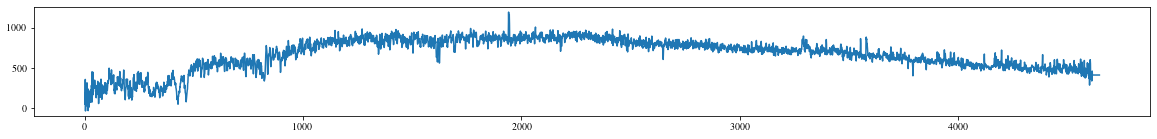

In [4]:
plt.figure(figsize=(20,2))
# plt.fill_between(flux['FLUX'] - 1./flux['IVAR'], flux['FLUX'] - 1./flux['IVAR'], color='gray', alpha=0.3)
plt.plot(flux['FLUX'])


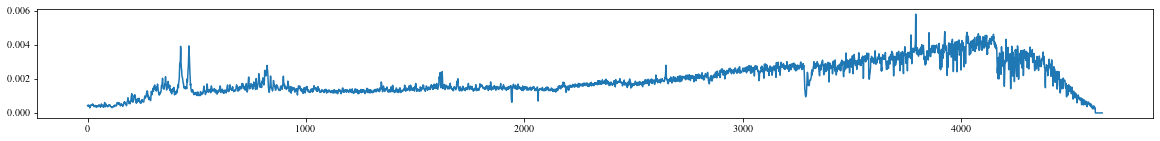

In [5]:
plt.figure(figsize=(20,2))
# plt.fill_between(flux['FLUX'] - 1./flux['IVAR'], flux['FLUX'] - 1./flux['IVAR'], color='gray', alpha=0.3)
plt.plot(flux['IVAR'])

In [112]:
# LOAD THE DATA
file = '../spectra/mwmStar-0.6.0-54381853.fits'
file_in = fits.open(file)
flux2 = np.array(file_in[1].data)


In [113]:
print(image[1].data["wavelength"][0][1] - image[1].data["wavelength"][0][0])
print(image[1].data["wavelength"][0])

0.8215332
[ 3566.9744  3567.796   3568.6174 ... 10394.414  10396.808  10399.201 ]


(0.0, 1.2)

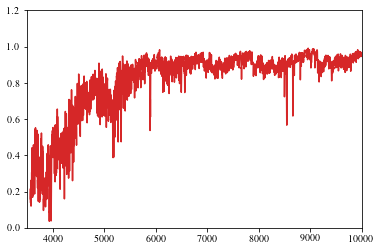

In [121]:
image = fits.open("../spectra_more/mwmStar-0.6.0-72159303.fits")
fig, ax = plt.subplots()
# ax.plot(image[1].data["wavelength"][0], image[1].data["flux"][0] / image[1].data["continuum"][0], c='k')
ax.plot(image[1].data["wavelength"][0], image[1].data["nmf_rectified_model_flux"][0], c='tab:red')
ax.set_xlim(3500, 10000)
ax.set_ylim(0, 1.2)

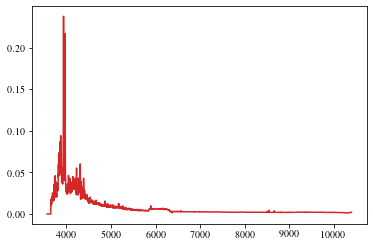

In [118]:
plt.plot(image[1].data["wavelength"][0], image[1].data["ivar"][0], c='tab:red')


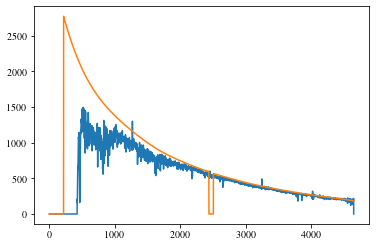

In [8]:
plt.plot(image[2].data["flux"][0])
plt.plot(image[2].data["continuum"][0])

In [ ]:
plt.figure(figsize=(20,2))
# plt.fill_between(flux['FLUX'] - 1./flux['IVAR'], flux['FLUX'] - 1./flux['IVAR'], color='gray', alpha=0.3)
plt.plot(flux2['continuum'])
